In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import make_classification
X,Y=make_classification(n_samples=1000,n_features=5,random_state=42)

In [ ]:
X_train=X[:750]
Y_train=Y[:750]
X_test=X[750:]
Y_test=Y[750:]

In [ ]:
X_train=X_train.T
X_test=X_test.T


(5, 750)

In [ ]:
Y_train=np.array(Y_train).reshape(1,-1)
Y_test=np.array(Y_test).reshape(1,-1)
Y_train.shape

(1, 750)

In [ ]:
nn_arch=[
    {'layer_units':5,'activation':'none'}, #input layer
    {'layer_units':5,'activation':'relu'},
    {'layer_units':4,'activation':'relu'},
    {'layer_units':3,'activation':'relu'},
    {'layer_units':1,'activation':'sigmoid'}
]

In [ ]:
def initialize_parameters(nn_arch,seed_value):
  np.random.seed(seed_value)
  parameters={}
  number_of_layers=len(nn_arch)
  for l in range(1,number_of_layers):
    parameters['W'+str(l)]=np.random.randn(
        nn_arch[l]['layer_units'],
        nn_arch[l-1]['layer_units']
    )*0.01
    parameters['b'+str(l)]=np.zeros((nn_arch[l]['layer_units'],1))
  return parameters

In [ ]:
parameters=initialize_parameters(nn_arch,3)

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
def relu(z):
  return np.maximum(0,z)

In [ ]:
def forward_propagation(parameters,X,nn_arch):
  forward_cache={}
  A_prev=X
  number_of_layers=len(nn_arch)
  for l in range(1,number_of_layers):
    activation=nn_arch[l]['activation']
    W=parameters['W'+str(l)]
    b=parameters['b'+str(l)]
    if activation=='relu':
      forward_cache['Z'+str(l)]=np.dot(W,A_prev)+b
      forward_cache['A'+str(l)]=relu(forward_cache['Z'+str(l)])
    elif activation=='sigmoid':
      forward_cache['Z'+str(l)]=np.dot(W,A_prev)+b
      forward_cache['A'+str(l)]=sigmoid(forward_cache['Z'+str(l)])
    A_prev=forward_cache['A'+str(l)]
  AL=forward_cache['A'+str(l)]
  forward_cache['A0']=X
  return AL,forward_cache



In [ ]:
AL,forward_cache=forward_propagation(parameters,X_train,nn_arch)

In [ ]:
def compute_cost(AL,Y):
  n=Y.shape[1]
  cost=(-1/n)*np.sum((Y*np.log(AL))+((1-Y)*np.log(1-AL)))
  cost=np.squeeze(cost)
  return cost

In [ ]:
compute_cost(AL,Y_train)

0.6931471977798648

In [ ]:
def sigmoid_backward(dA_prev,Z):
  S=sigmoid(Z)
  dS=S*(1-S)
  return dA_prev*dS

In [ ]:
def relu_backward(dA_prev,Z):
  dZ=np.array(dA_prev,copy=True)
  dZ[dZ<=0]=0
  return dZ

In [ ]:
def back_propagation(Y,AL,forward_cache,nn_arch,parameters):
  grads={}
  n=Y.shape[1]
  number_of_layers=len(nn_arch)
  dAL=(AL-Y)/(AL*(1-AL))
  dA_prev=dAL
  for l in reversed(range(1,number_of_layers)):
    activation=nn_arch[l]['activation']
    W_curr=parameters['W'+str(l)]
    Z_curr=forward_cache['Z'+str(l)]
    A_prev=forward_cache['A'+str(l-1)]
    if activation=='sigmoid':
      dZ=sigmoid_backward(dA_prev,Z_curr)
      grads['dW'+str(l)]=(1/n)*np.dot(dZ,A_prev.T)
      grads['db'+str(l)]=(1/n)*np.sum(dZ,axis=1,keepdims=True)
      dA_prev=np.dot(W_curr.T,dZ)
    elif activation=='relu':
      dZ=relu_backward(dA_prev,Z_curr)
      grads['dW'+str(l)]=(1/n)*np.dot(dZ,A_prev.T)
      grads['db'+str(l)]=(1/n)*np.sum(dZ,axis=1,keepdims=True)
      dA_prev=np.dot(W_curr.T,dZ)
  return grads



In [ ]:
grads=back_propagation(Y_train,AL,forward_cache,nn_arch,parameters)

In [ ]:
def update_parameters(parameters,grads,nn_arch,lr):
  number_of_layers=len(nn_arch)
  for l in range(1,number_of_layers):
    parameters['W'+str(l)]=parameters['W'+str(l)]-lr*grads['dW'+str(l)]
    parameters['b'+str(l)]=parameters['b'+str(l)]-lr*grads['db'+str(l)]
  return parameters

In [ ]:
update_parameters(parameters,grads,nn_arch,0.1)

{'W1': array([[ 0.01788619,  0.00436514,  0.00096498, -0.01863488, -0.00277387],
        [-0.00354812, -0.0008272 , -0.00626998, -0.00043791, -0.00477212],
        [-0.01313865,  0.00884622,  0.00881318,  0.01709573,  0.00050034],
        [-0.00404677, -0.0054536 , -0.01546477,  0.00982367, -0.01101068],
        [-0.01185047, -0.0020565 ,  0.01486148,  0.00236716, -0.01023785]]),
 'b1': array([[-9.45966491e-08],
        [-5.38607201e-07],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00]]),
 'W2': array([[-0.00713026,  0.00625242, -0.00160518, -0.00768845, -0.00230036],
        [ 0.00744989,  0.01976104, -0.01244132, -0.00626434, -0.00803777],
        [-0.02419083, -0.00923792, -0.01023876,  0.01123978, -0.00131914],
        [-0.01623285,  0.00646675, -0.00356271, -0.01743141, -0.0059665 ]]),
 'b2': array([[-1.14332596e-05],
        [-2.36384423e-05],
        [ 0.00000000e+00],
        [ 0.00000000e+00]]),
 'W3': array([[-0.00588594, -0.00873932,  0.000297

In [ ]:
def training(X,Y,nn_arch,iterations,lr):
  costs=[]
  parameters=initialize_parameters(nn_arch,3)
  for i in range(iterations):
    AL,forward_cache=forward_propagation(parameters,X,nn_arch)
    cost=compute_cost(AL,Y)
    if (i%100==0):
      print('iterations:'+str(i)+','+'cost:'+str(cost))
      costs.append(cost)
    grads=back_propagation(Y,AL,forward_cache,nn_arch,parameters)
    parameters=update_parameters(parameters,grads,nn_arch,lr)
  return parameters,costs

In [ ]:
parameters,costs=training(X_train,Y_train,nn_arch,10000,0.001)

iterations:0,cost:0.6931471977798648
iterations:100,cost:0.6931222069806102
iterations:200,cost:0.693098451524942
iterations:300,cost:0.6930758547749327
iterations:400,cost:0.6930543602099746
iterations:500,cost:0.693033914065595
iterations:600,cost:0.6930144651992286
iterations:700,cost:0.6929959649625036
iterations:800,cost:0.6929783670797292
iterations:900,cost:0.692961627532286
iterations:1000,cost:0.6929457044486338
iterations:1100,cost:0.6929305579996644
iterations:1200,cost:0.6929161502991459
iterations:1300,cost:0.692902445309006
iterations:1400,cost:0.6928894087492264
iterations:1500,cost:0.6928770080121192
iterations:1600,cost:0.6928652120807784
iterations:1700,cost:0.692853991451502
iterations:1800,cost:0.692843318059988
iterations:1900,cost:0.6928331652111319
iterations:2000,cost:0.6928235075122384
iterations:2100,cost:0.6928143208094898
iterations:2200,cost:0.6928055821275109
iterations:2300,cost:0.6927972696118777
iterations:2400,cost:0.6927893624744316
iterations:2500,co

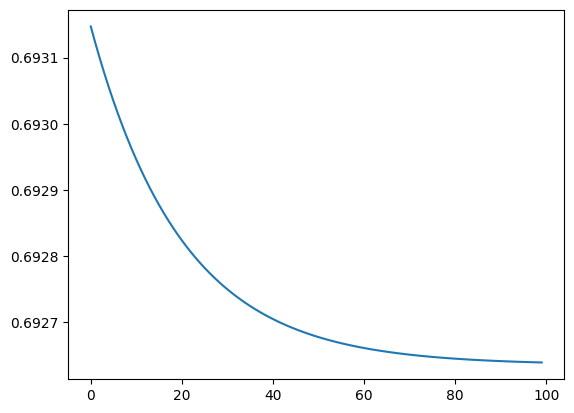

In [ ]:
import matplotlib.pyplot as plt
plt.plot(costs)